In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from research_utils.database.database import Database

## Percentage of Crowd Sourced Reqs

In [5]:
database = Database()

In [11]:
sql = """
SELECT CAST(a.crowd AS DECIMAL)/b.total as crowd_pct, a.package_id, c.package_name, b.total
FROM(
	SELECT COUNT(*) as crowd, package_id
	FROM open_source.issue_contributors
	WHERE commit_pct <= {pct}
	GROUP BY package_id
) a
INNER JOIN (
	SELECT COUNT(*) as total, package_id
	FROM open_source.issue_contributors
	GROUP BY package_id
) b
ON a.package_id = b.package_id
INNER JOIN open_source.packages c
ON a.package_id = c.id
WHERE b.total < 1000
"""

#### Crowd Sourcing in Open Source Projects

Based on our analysis of the data set, 964 project source requirements from the crowd. As we can see from the plots below, there is a wide distribution of contribution patters in our data set. The scatter plot also shows that contribution patterns vary widely by project size as well.

(0, 1)

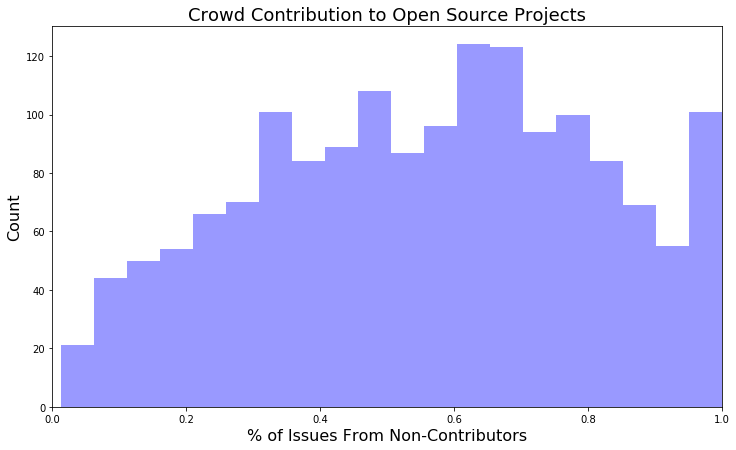

In [12]:
df = pd.read_sql(sql.format(pct=0.0), database.connection)
plt.figure(figsize=(12, 7))
sns.distplot(df['crowd_pct'], kde=False, color='blue', bins=20)
plt.title('Crowd Contribution to Open Source Projects', fontsize=18)
plt.xlabel('% of Issues From Non-Contributors', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0,1])

In [9]:
sql = """
SELECT COUNT(DISTINCT a.package_id)
FROM(
	SELECT COUNT(*) as crowd, package_id
	FROM open_source.issue_contributors
	WHERE commit_pct > 0.5
	GROUP BY package_id
) a
INNER JOIN (
	SELECT COUNT(*) as total, package_id
	FROM open_source.issue_contributors
	GROUP BY package_id
) b
ON a.package_id = b.package_id
INNER JOIN open_source.packages c
ON a.package_id = c.id
WHERE b.total < 1000
"""
df = pd.read_sql(sql, database.connection)
df.head()

,count
0,964


(0, 1)

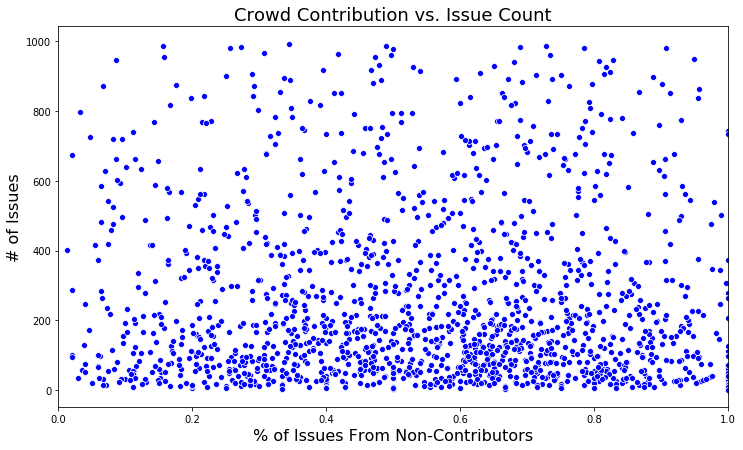

In [6]:
df = pd.read_sql(sql.format(pct=0.00), database.connection)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['crowd_pct'], y=df['total'], color='blue')
plt.title('Crowd Contribution vs. Issue Count', fontsize=18)
plt.xlabel('% of Issues From Non-Contributors', fontsize=16)
plt.ylabel('# of Issues', fontsize=16)
plt.xlim([0,1])

### Number of Years Projects Have Been Active

The number of years projects in the data set have been active vary widely. As a result, we need to sample data in such a way that we are comparing apples to apples when discussing the networks (i.e. we don't want a network to appear artificially large and dense, just because it has been around for longer)

In [7]:
sql = """
select count(*) as total, yr
from(
select extract(year from AGE(min(created_at))) as yr
from open_source.issues
group by package_id
) x 
group by yr
order by yr desc
"""

In [11]:
df

,total,yr
0,1,15.0
1,9,10.0
2,46,9.0
3,156,8.0
4,230,7.0
5,322,6.0
6,349,5.0
7,324,4.0
8,212,3.0
9,139,2.0
